# <span style="color:green">Project:Temperature forecasting for Toronto, using LSTM model to predict the temperature </span>

# <span style="color:green"> Jiayi Zhang</span>

# <span style="color:blue">P1: Collect data and display actual data</span>

# <span style="color:green">>load file</span>

In [57]:
#import pandas for data manipulation 
import pandas as pd
#import numpy for handling multi-dimensional arrays
import numpy as np
#import matplotlib to render graphic chart
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#turn oneDNN off in order to avoid floating-point round-off errors from different computation orders. 
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf
#import MinMaxScaler to scale the data to a fixed range(0,1)
from sklearn.preprocessing import MinMaxScaler
#import sequential for data stack of layers
from tensorflow.keras.models import Sequential
#import LSTM model and DENSE layer
from tensorflow.keras.layers import LSTM, Dense

# Load the data from .csv file
df = pd.read_csv('weatherstats_toronto_daily.csv')

# <span style="color:green">pick up 'avg_temperature' and 'date', set 'date' column as the index, check format</span>

In [60]:
#pick up 'avg_temperature' and 'date' two column and make a copy
data = df[['date','avg_temperature']].copy()
#convert the 'date' column to datetime format for indexing
data['date'] = pd.to_datetime(data['date'])

#set 'date' column as the index
data.set_index('date', inplace=True)

#print head of data to check
print(data.head())

            avg_temperature
date                       
2024-10-28             7.40
2024-10-27             6.05
2024-10-26             7.10
2024-10-25             7.55
2024-10-24             7.55


# <span style="color:green">>plot the actual data of temperature into chart

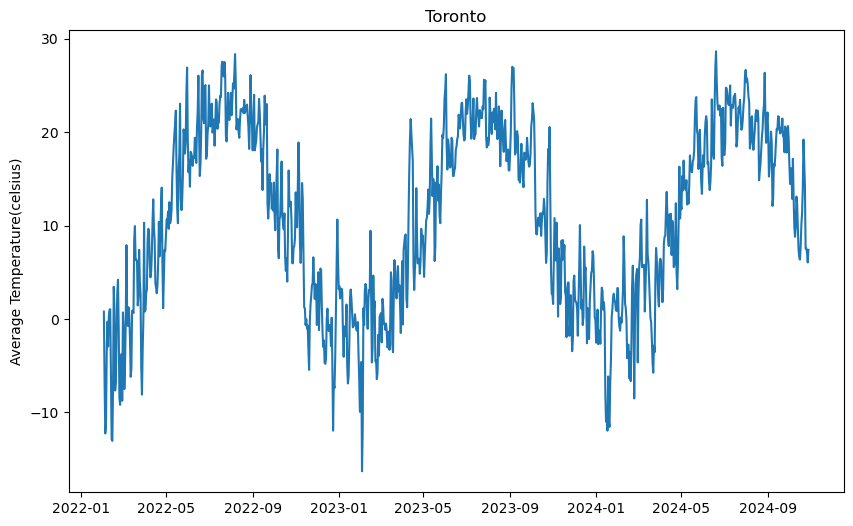

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Toronto')
plt.ylabel('Average Temperature(celsius)')
plt.show()

# <span style="color:blue">P2:Create sequences and train the LSTM</span>

# <span style="color:green"> Normalize the data</span>

In [67]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# <span style="color:green"> Create the sequence </span>

In [70]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# <span style="color:green"> Split the data into train and test sets </span>

In [73]:
# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.5)
train_data = scaled_data[-train_size:] #because data is stored in descending order
test_data = scaled_data[-len(scaled_data):-train_size]

seq_length = 365  # Number of time steps : 365days
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_train : (135, 365, 1) y_train : (135, 1)
X_test : (135, 365, 1) y_test : (135, 1)


# <span style="color:green"> Train LSTM model </span>

In [85]:
retrain = 0
while retrain == 0:
    # fix random seed for reproducibility
    tf.random.set_seed(7)
    #initialising the model
    model = Sequential()
    #adding LSTM layers
    model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
    #adding the dense layer
    model.add(Dense(1))
    #set optimizer algorithm, loss function, and metrics
    model.compile(optimizer='adam', loss='mean_squared_error')
    #train the model 
    #batch_size set to 32, set termination on NaN
    history=model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,callbacks=[tf.keras.callbacks.TerminateOnNaN()])
    #if training is stopped on NaN
    if model.stop_training: 
        print("Training is terminated due to loss=nan, and redo the training")
        retrain = 0 #set retrain = 0 to redo the training
    else:
        retrain = 1 
#print(history.history)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.3004
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2345
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1807
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1298
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0803
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0340
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0183
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0134
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0143
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0159
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0136
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0119
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0120
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0116
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0117
Epoch 16/100
5/5 ━━

In [86]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

# <span style="color:blue">P3: Predicate and verify Model</span>

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


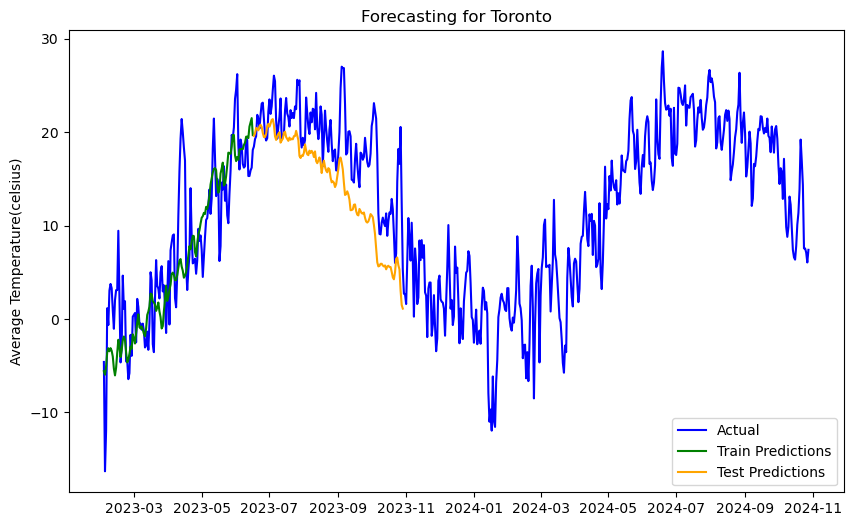

In [90]:
# make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot predictions
plt.figure(figsize=(10, 6))
# Plot actual data

plt.plot(data.index[-len(scaled_data):-seq_length], data['avg_temperature'][-len(scaled_data):-seq_length], label='Actual', color='blue')

# plot training predictions
plt.plot(data.index[-seq_length-len(train_predictions):-seq_length], train_predictions, label='Train Predictions',color='green')

# plot testing predictions
plt.plot(data.index[-seq_length-len(train_predictions)-len(test_predictions):-seq_length-len(train_predictions)], test_predictions, label='Test Predictions',color='orange')

plt.title('Forecasting for Toronto')
plt.ylabel('Average Temperature(celsius)')
plt.legend()
plt.show()

# <span style="color:blue">P4: Temperature forecast (30 days)</span>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

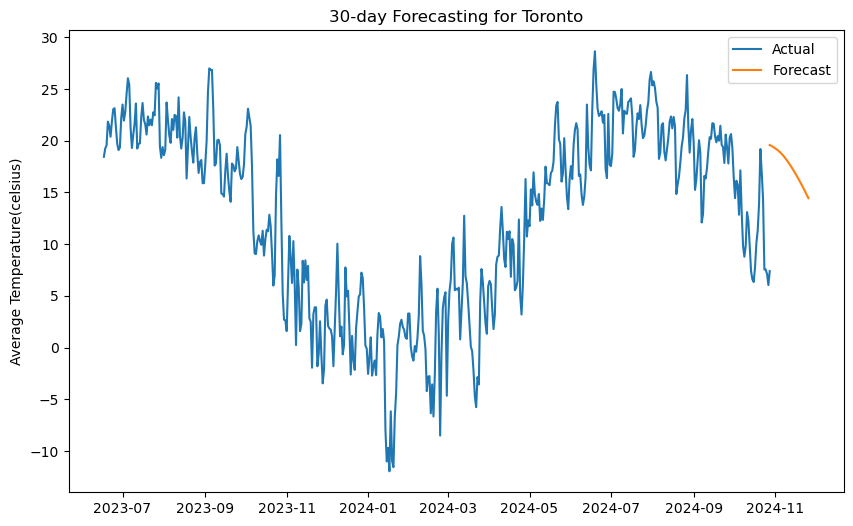

In [93]:
forecast_period = 30
forecast = []

# make predictions from lastest test data
last_sequence = X_test[-1]

for _ in range(forecast_period):
    # reshape the sequence to match the input shape of the model
    sequence = last_sequence.reshape(1, X_test.shape[1], 1)
    # predict the next value
    next_prediction = model.predict(sequence)[0][0]
    
    # add the predicted value 
    forecast.append(next_prediction)
    # update the last sequence by removing the first element and appending the predicted value
    last_sequence = np.append(last_sequence[1:], next_prediction)

# inverse transform the forecast for the single sample
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(test_data)], scaler.inverse_transform(test_data), label='Actual')
plt.plot(pd.date_range(start=data.index[0], periods=forecast_period, freq='D'), forecast, label='Forecast')
plt.title('30-day Forecasting for Toronto')
plt.ylabel('Average Temperature(celsius)')
plt.legend()
plt.show()